# Section 1 - Investigate the wine data set and perform dimensionality reduction. (AA3.2, 7 marks)

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0                        

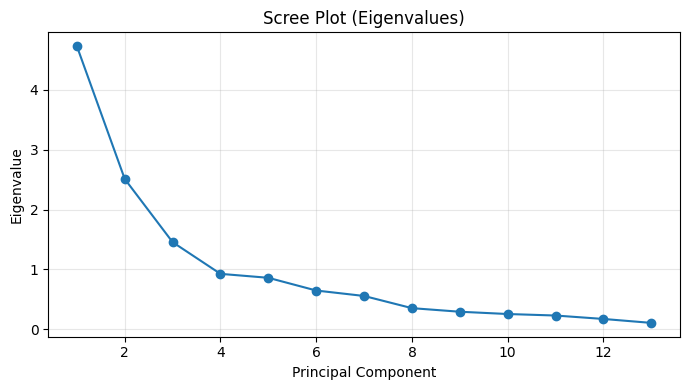

d) Chosen number of dimensions: k = 10 (>= 95% variance)
Saved PCA-transformed data to: wine_pca.csv (columns: ['PC1', 'PC2', 'PC3'] + target)
First 10 rows of PCA-transformed data (PC1..PC3):
        PC1       PC2       PC3  class
0  3.316751  1.443463 -0.165739      1
1  2.209465 -0.333393 -2.026457      1
2  2.516740  1.031151  0.982819      1
3  3.757066  2.756372 -0.176192      1
4  1.008908  0.869831  2.026688      1
5  3.050254  2.122401 -0.629396      1
6  2.449090  1.174850 -0.977095      1
7  2.059437  1.608963  0.146282      1
8  2.510874  0.918071 -1.770969      1
9  2.753628  0.789438 -0.984247      1


In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# a) Perform PCA on all attributes (excluding the variety/target)
# fetch dataset
wine = fetch_ucirepo(id=109)

# features and target
X = wine.data.features
print(X.head())
# Targets are kept aside and not used in PCA
try:
    y = wine.data.targets
    target_col_name = y.columns[0]
except Exception:
    y = None
    target_col_name = "target"

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA with all components
pca_full = PCA(n_components=13)
X_pca_full = pca_full.fit_transform(X_scaled)

# a) Results summary
explained_var_ratio = pca_full.explained_variance_ratio_
cum_evr = np.cumsum(explained_var_ratio)
print("PCA Results")
print(np.round(explained_var_ratio, 6).tolist())
print("Cumulative explained variance ratio:")
print(np.round(cum_evr, 6).tolist())

# b) Eigenvalues (descending)
eigenvalues = pca_full.explained_variance_
# sklearn returns components ordered by descending explained variance
print("Eigenvalues :")
print(np.round(eigenvalues, 6).tolist())

# c) Scree plot (Eigenvalues)
plt.figure(figsize=(7,4))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title('Scree Plot (Eigenvalues)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# d) Choose number of dimensions to keep using >=95% cumulative explained variance
threshold = 0.95
k = int(np.argmax(cum_evr >= threshold)) + 1
print(f"d) Chosen number of dimensions: k = {k} (>= {threshold*100:.0f}% variance)")

# Save only the first 3 principal components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

pc_cols = ["PC1", "PC2", "PC3"]
df_pca = pd.DataFrame(X_pca_3, columns=pc_cols)
if y is not None:
    df_pca[target_col_name] = y[target_col_name]

# Save updated data (only PC1..PC3)
output_path = 'wine_pca.csv'
df_pca.to_csv(output_path, index=False)
print(f"Saved PCA-transformed data to: {output_path} (columns: {pc_cols} + target)")

# Show first 10 rows for documentation/screenshot
print("First 10 rows of PCA-transformed data (PC1..PC3):")
print(df_pca.head(10))

## PCA Results Summary

**a) PCA on features:**
- Explained variance ratio per component:
  - [0.361988, 0.192075, 0.111236, 0.07069, 0.065633, 0.049358, 0.042387, 0.026807, 0.022222, 0.0193, 0.017368, 0.012982, 0.007952]
- Cumulative explained variance:
  - [0.361988, 0.554063, 0.6653, 0.73599, 0.801623, 0.850981, 0.893368, 0.920175, 0.942397, 0.961697, 0.979066, 0.992048, 1.0]

**b) Eigenvalues :**
- [4.732437, 2.511081, 1.454242, 0.924166, 0.858049, 0.645282, 0.554141, 0.350466, 0.290512, 0.25232, 0.227064, 0.169724, 0.103962]

**d) Dimension choice vs saved output:**
- Chosen `k = 13`, components meet ≥95% cumulative explained variance (0.9617).
- the saved dataset includes only `PC1`, `PC2`, `PC3` plus the original target column.


In [4]:
import pandas as pd

# Display first 10 rows of the saved PCA data for screenshot
df = pd.read_csv('wine_pca.csv')
df.head(10)

,PC1,PC2,PC3,class
0,3.316751,1.443463,-0.165739,1
1,2.209465,-0.333393,-2.026457,1
2,2.516740,1.031151,0.982819,1
3,3.757066,2.756372,-0.176192,1
4,1.008908,0.869831,2.026688,1
5,3.050254,2.122401,-0.629396,1
6,2.449090,1.174850,-0.977095,1
7,2.059437,1.608963,0.146282,1
8,2.510874,0.918071,-1.770969,1
9,2.753628,0.789438,-0.984247,1


# Section 2 - Find and analyse clusters in the data set. (KU1.2, 5 marks) (SE4.3, 10 marks) (KU3.1, 5 marks)

### Task 1 - Clustering Analysis

**K-Means Clustering**

- `K-Means` is a center based partitioning algorithm that optimizes the grouping of wine samples by minimizing the inertia, or the within-cluster sum of squares (WCSS). Recent research has demonstrated that the algorithm's effectiveness depends on the "proximity condition," where data points are closer to their own cluster center.

- **Expected Results**
    - The Algorithm typically partitions the 13 chemical constituents into three distinct, non-overlapping groups. Modern applications show that after attribute selection, K-Means successfully identifies representative wines for specific regions, effectively separating them into compact cells based on features like proline and color intensity.
- **Advantages**
    - K-Means is intended mainly for small-to-medium datasets due to its linear computational complexity. Recent  techniques have  improved its speed by using sampling and speculation to break iterative dependencies, allowing it to focus towards optimal solutions significantly faster than other implementations.
- **Disadvantages**
    - The main drawback is that the algorithm is more sensitive to initial conditions, which can lead to local optima. Modern studies emphasize that without advanced "seeding" (like K-Means++), different random seeds may yield inconsistent results, particularly in wine data where the number of attributes ($d=13$) can lead to sparse feature space overlap.

**Density-Based Clustering (DBSCAN)**

- `DBSCAN`(Density-Based Spatial Clustering of Applications with Noise) identifies clusters by locating regions where the concentration of wine samples exceeds a density threshold ($\epsilon$ and $minPts$). Recent findings include adaptive parameters that use optimization algorithms, such as the Whale Optimization Algorithm, to automatically tune parameters for better accuracy.

- **Expected Results**
    - DBSCAN is likely to identify the primary wine cultivars as high-density clusters while simultaneously flagging outlying  wine samples as noise. This is particularly useful in quality control, where an anomaly (outlier) may represent a production error that a partitioning algorithm like K-Means would fail to catch.
- **Advantages**
    - The algorithm's strength is its ability to discover clusters of arbitrary shapes, which is critical for complex chemical distributions. Furthermore, modern surveys show its robustness to noise and its lack of requirement for a pre-set $k$ value, allowing for a more organic discovery of wine varieties.
- **Disadvantages**
    - In 13-dimensional datasets, `DBSCAN` often faces challenges due to the dimensionality, where the distance between points becomes uniform. Tuning the $\epsilon$ parameter for wine data is difficult because the density of chemical profiles can vary between different types of cultivars, potentially causing some clusters to be missed.

**Hierarchical Clustering**

- `Hierarchica`l clustering builds a nested structure of groups through a bottom-up approach (`Dendograms`). Recent implementations, such as Hierarchical Fuzzy Clustering (HFC), have improved the precision of this method by using fuzzy logic to discovery highly concentrated data areas quickly before merging them into the final categorical tree or dendrogram.

- **Expected Results**
    -  The resulting dendrogram provides a visual "genealogy" of the wine samples. By examining the distance between branches, one can determine the chemical similarity between the three categories. It is expected to show a clear hierarchy where wines with similar phenolic profiles are merged into sub-clusters before joining larger groups.
- **Advantages**
    - This method is superior for understanding the relationships between wine varieties. Its visual nature allows researchers to observe groupings without deciding on a fixed number of clusters upfront. Recent applications data prove its effectiveness in uncovering subtle sub-types that other methods might overlook.
- **Disadvangtages**
    - The computational cost remains high ($O(n^2)$ or $O(n^3)$), making it less efficient for large datasets. Additionally, modern critiques note that the "greedy" nature of the algorithm—where once two wines are merged, they cannot be un-merged—can lead to the propagation of early clustering errors throughout the entire tree structure.


# References

[1] R. Kannan, H. Salmasian, and S. Vempala, "Clustering with Spectral Norm and the k-Means Algorithm," in 2010 IEEE 51st Annual Symposium on Foundations of Computer Science, Las Vegas, NV, USA, 2010, pp. 122-131. [Online]. Available: https://doi.org/10.1109/FOCS.2010.35

[2] B. Chen, "Clustering in Wineinformatics with Attribute Selection to Increase Uniqueness of Clusters," Fermentation, vol. 7, no. 1, p. 27, Feb. 2021. [Online]. Available: https://doi.org/10.3390/fermentation7010027

[3] O. S. Kulkarni and A. Burhanpurwala, "A Survey of Clustering Algorithms for Determining Optimal Locations of Distributed Centers," IASJ: Problems of Information Technology, Jan. 2025. [Online]. Available: https://iasj.rdd.edu.iq/journals/uploads/2025/01/31/c9e44b5695a1c90aad322e48a6568d4f.pdf

[4] G. Dewta and R. Tiwari, "A Distributed Approach for the Development of the DBSCAN Clustering," International Journal of Advance Research, Ideas and Innovations in Technology, vol. 3, no. 2, pp. 975-980, Apr. 2017. [Online]. Available: https://scispace.com/pdf/a-distributed-approach-for-the-development-of-the-dbscan-165nur5y2y.pdf

[5] G. Li, S. Zhang, and J. Xu, "A Hierarchical Fuzzy Clustering Algorithm," in 2010 International Conference on Computer Application and System Modeling (ICCASM 2010), Taiyuan, China, 2010, pp. V2-555-V2-558. [Online]. Available: https://www.researchgate.net/publication/251962271_A_Hierarchical_Fuzzy_Clustering_Algorithm

[6] J. H. Ward, "Assessing the Value of Data-Driven Frameworks for Personalized Medicine: A Critical Overview," MDPI Machine Learning and Knowledge Extraction, vol. 8, no. 1, p. 16, Jan. 2026. [Online]. Available: https://doi.org/10.3390/make8010016

### Task 2 - K-Means Implementation and Application (3 marks)


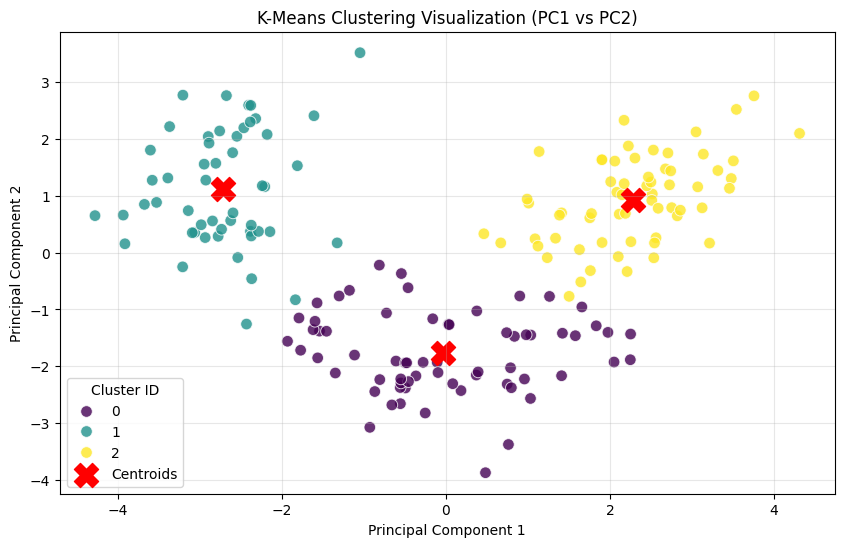

Resulting Cluster Counts:
Cluster
0    65
2    62
1    51
Name: count, dtype: int64


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df_pca['Cluster'] = cluster_labels
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    data=df_pca, 
    palette='viridis', 
    s=70, 
    alpha=0.8
)

centroids_pca = pca_3.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids_pca[:, 0], 
    centroids_pca[:, 1], 
    s=300, 
    c='red', 
    marker='X', 
    label='Centroids'
)

plt.title('K-Means Clustering Visualization (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster ID')
plt.grid(True, alpha=0.3)
plt.show()

# Display counts per cluster
print("Resulting Cluster Counts:")
print(df_pca['Cluster'].value_counts())

### Description of Resulting Clusters
The visualization above displays the data points projected onto the first two principal components, colored by their K-Means cluster assignment.

* **Distinct Groups:** The K-means algorithm successfully identified three distinct groups within the wine dataset.
* **Separation:** Two clusters appear to be well-separated, while there is some proximity/overlap between the central cluster and the one on the right, which is consistent with the nature of the wine dataset varieties.
* **Centroids:** The red 'X' markers indicate the mathematical center of each cluster in the transformed feature space.